# Import libraries

In [97]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Import Data

In [98]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [100]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [101]:
heart_df = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa', 'output']]
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


In [102]:
heart_df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
caa         int64
output      int64
dtype: object

In [103]:
X = np.asarray(heart_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa']])
X[0:5]          

array([[ 63,   1,   3, 145, 233,   1,   0, 150,   0,   0],
       [ 37,   1,   2, 130, 250,   0,   1, 187,   0,   0],
       [ 41,   0,   1, 130, 204,   0,   0, 172,   0,   0],
       [ 56,   1,   1, 120, 236,   0,   1, 178,   0,   0],
       [ 57,   0,   0, 120, 354,   0,   1, 163,   1,   0]])

# Preprocessing

In [104]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X[0:5]

array([[ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39, -1.01,  0.02, -0.7 ,
        -0.71],
       [-1.92,  0.68,  1.  , -0.09,  0.07, -0.42,  0.9 ,  1.63, -0.7 ,
        -0.71],
       [-1.47, -1.47,  0.03, -0.09, -0.82, -0.42, -1.01,  0.98, -0.7 ,
        -0.71],
       [ 0.18,  0.68,  0.03, -0.66, -0.2 , -0.42,  0.9 ,  1.24, -0.7 ,
        -0.71],
       [ 0.29, -1.47, -0.94, -0.66,  2.08, -0.42,  0.9 ,  0.58,  1.44,
        -0.71]])

In [105]:
y = np.asarray(heart_df['output'])
y[0:5]

array([1, 1, 1, 1, 1])

# Split Data

In [106]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=4)
print(train_X.shape)
print(test_X.shape)

(242, 10)
(61, 10)


# First Model -> decision tree using entropy

In [53]:
heartTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
heartTree

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
heartTree.fit(train_X, train_y)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
y_pred = heartTree.predict(test_X)
print(y_pred[0:5])
print(test_y[0:5])

[1 0 1 1 0]
[1 0 1 1 0]


In [27]:
from sklearn import metrics
metrics.accuracy_score(test_y, y_pred)

0.819672131147541

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        25
           1       0.90      0.78      0.84        36

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61

Confusion matrix, without normalization
[[22  3]
 [ 8 28]]


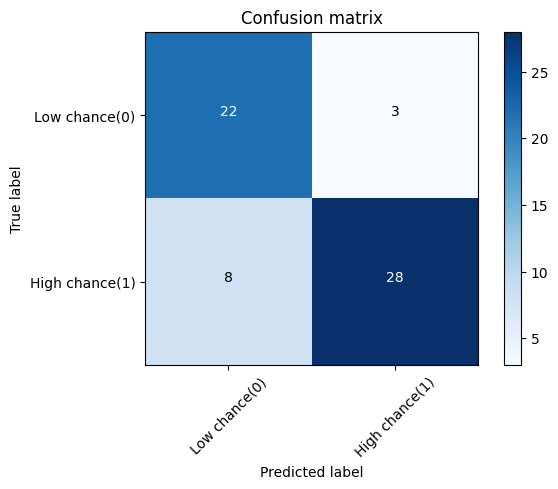

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(test_y, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low chance(0)','High chance(1)'],normalize= False,  title='Confusion matrix')

# Using f2_score due to high FN

In [36]:
from sklearn.metrics import fbeta_score

f2 = fbeta_score(test_y, y_pred, beta=2)
print("F2-score:", f2)


F2-score: 0.8


# Second model -> decision tree with gimni

In [64]:
heartTree = DecisionTreeClassifier(max_depth = 4)
heartTree

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [65]:
heartTree.fit(train_X, train_y)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
y_pred = heartTree.predict(test_X)

In [67]:
from sklearn.metrics import fbeta_score

f2 = fbeta_score(test_y, y_pred, beta=2)
print("F2-score:", f2)

F2-score: 0.8659217877094972


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, y_pred)

array([[21,  4],
       [ 5, 31]])

# Here FN reduced by 3 person so far a better model

# Third Model -> using SVM

In [146]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, fbeta_score, classification_report

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    clf = svm.SVC(kernel = kernel)
    clf.fit(train_X, train_y)
    yhat = clf.predict(test_X)

    cnf_matrix = confusion_matrix(test_y, yhat, labels=[0,1])
    print(cnf_matrix)
    print("Jaccard_score: ", jaccard_score(test_y, yhat,pos_label=1))
    print("f1_score: ", f1_score(test_y, yhat, average='weighted'))
    print(classification_report(test_y, yhat))
    print("-------------------------------------------------------")

[[21  4]
 [ 2 34]]
Jaccard_score:  0.85
f1_score:  0.9009193619849357
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

-------------------------------------------------------
[[19  6]
 [ 3 33]]
Jaccard_score:  0.7857142857142857
f1_score:  0.8507010812696197
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61

-------------------------------------------------------
[[20  5]
 [ 3 33]]
Jaccard_score:  0.8048780487804879
f1_score:  0.8678924826465

# So here based on lower FN best model is SVM with linear kernel

# Furth Model Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score, fbeta_score, classification_report

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for solver in solvers:
    LR = LogisticRegression(C=0.1, solver=solver).fit(train_X, train_y)
    yhat = LR.predict(test_X)
    yhat_prob = LR.predict_proba(test_X)
    print(confusion_matrix(test_y, yhat))
    print('Log_loss:', log_loss(test_y, yhat_prob))
    print(classification_report(test_y, yhat))
    print("-------------------------------------------------------")

[[21  4]
 [ 2 34]]
Log_loss: 0.3435929006438403
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

-------------------------------------------------------
[[21  4]
 [ 2 34]]
Log_loss: 0.34420541596542137
              precision    recall  f1-score   support

           0       0.91      0.84      0.88        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

-------------------------------------------------------
[[21  4]
 [ 2 34]]
Log_loss: 0.34361053753784143
              precision    recall  f1-score   support

           0       0.91      0.84

# Let's lower the C see we get better results

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score, fbeta_score, classification_report

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for solver in solvers:
    LR = LogisticRegression(C=0.01, solver=solver).fit(train_X, train_y)
    yhat = LR.predict(test_X)
    yhat_prob = LR.predict_proba(test_X)
    print(confusion_matrix(test_y, yhat))
    print("Log_loss: ", log_loss(test_y, yhat_prob))
    print(classification_report(test_y, yhat))
    print("-------------------------------------------------------")

[[20  5]
 [ 2 34]]
Log_loss:  0.4693184292280674
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61

-------------------------------------------------------
[[20  5]
 [ 2 34]]
Log_loss:  0.47400719287898124
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61

-------------------------------------------------------
[[20  5]
 [ 2 34]]
Log_loss:  0.4693306550589673
              precision    recall  f1-score   support

           0       0.91      0.

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score, fbeta_score, classification_report

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for solver in solvers:
    LR = LogisticRegression(C=0.001, solver=solver).fit(train_X, train_y)
    yhat = LR.predict(test_X)
    yhat_prob = LR.predict_proba(test_X)
    print(confusion_matrix(test_y, yhat))
    print("Log_loss", log_loss(test_y, yhat_prob))
    print(classification_report(test_y, yhat))
    print("-------------------------------------------------------")

[[10 15]
 [ 0 36]]
Log_loss 0.6334323228178249
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        25
           1       0.71      1.00      0.83        36

    accuracy                           0.75        61
   macro avg       0.85      0.70      0.70        61
weighted avg       0.83      0.75      0.72        61

-------------------------------------------------------
[[20  5]
 [ 2 34]]
Log_loss 0.6423702991518505
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61

-------------------------------------------------------
[[10 15]
 [ 0 36]]
Log_loss 0.6334594651269077
              precision    recall  f1-score   support

           0       1.00      0.40     

# Here by lowering C we turn FN to 0 and FP is increased to 15 and log_loss increased from 0.35 to 0.6, therefore my model based on recall here is good for predicting number 1 but not that good to predict number 0 So due to better FN and that hear attack is an important issue I prefer this model because our FN is 0 and our recall for number 1 is 1

# Result:

## 1. So best model is Logistic Regression with these solvers 'newton-cg', 'newton-cholesky', 'sag', 'saga' and C = 0.001 -> due to FN=0

## 2. SVM model with linear kernel will give us good results -> good performance on 0 and 1 

## 3. Logistic Regression with any solver and C = 0.1 give us good results both on 1 and 0 and alos have lower log_loss -> lower log loss than number 4

## 4. Logistic Regression with solver liblinear is also a good model because it has good performace on both 0 and 1s with C = 0.001

# Predict with data

In [148]:
my_data = np.asarray([[62, 1, 0, 120, 200, 0, 0, 150, 1, 0]])
my_data = scaler.transform(my_data)
predict = heartTree.predict(my_data)
if predict:
    print("You have high chance of heart attack.")
else:
    print("You have low chance of heart attack.")

You have high chance of heart attack.
